Manually calculated Spearman's rho = 0.8957983193277311
Results of scipy.stats Spearman Rho: SpearmanrResult(correlation=0.895798319327731, pvalue=1.5875897924312882e-18)


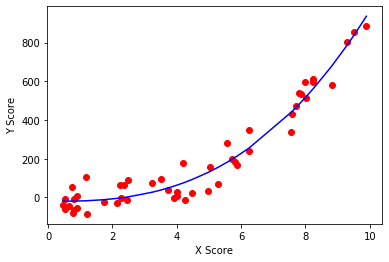

In [37]:
import scipy.stats
import statistics as stats
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.interpolate import *

# creating the data

x = []
y = []

for i in range (50):
    x.append(np.random.uniform(0,10))
    
count = 0
for i in x:
    randnum = np.random.randint(-50, 50)
    y.append(x[count]**3 + np.random.uniform(-90,90) + randnum)
    count= count+1

# calculating the ranks

x_ranks = scipy.stats.rankdata(x)
y_ranks = scipy.stats.rankdata(y)

#calculating the mean of the ranks
x_rank_mean = stats.mean(x_ranks)
y_rank_mean = stats.mean(y_ranks)

#calculating the sum of the product of the deviations of the ranks

x_rank_dev = []
y_rank_dev = []


count = 0
for i in x_ranks:
    x_rank_dev.append(x_ranks[count] - x_rank_mean)
    count = count + 1
    
count = 0
for i in y_ranks:
    y_rank_dev.append(y_ranks[count] - y_rank_mean)
    count = count + 1
    
products = []

count = 0
if len(x) == len(y):
    for i in x_rank_dev:
        products.append(x_rank_dev[count]*y_rank_dev[count])
        count = count+1
        
sum_products = sum(products)

# calculating the sum of sqaures for the ranks

x_sq_dev = []

count = 0
for i in x_rank_dev:
    x_sq_dev.append(x_rank_dev[count]**2)
    count = count + 1
    
SS_x = sum(x_sq_dev)
    
y_sq_dev = []

count = 0
for i in y_rank_dev:
    y_sq_dev.append(y_rank_dev[count]**2)
    count = count + 1
    
SS_y = sum(y_sq_dev)

# calculating Spearman's rho

rho = sum_products/math.sqrt(SS_x*SS_y)

print("Manually calculated Spearman's rho =", rho)

#checking results with scipy.stats.spearmanr

print('Results of scipy.stats Spearman Rho:', scipy.stats.spearmanr(x,y))

# plotting the data

fit = np.polyfit(x,y,3)

plt.scatter(x,y, color = 'red')
plt.plot(np.sort(x),np.polyval(fit,np.sort(x)), 'b-')
plt.xlabel('X Score')
plt.ylabel('Y Score')

plt.show()